In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [7]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

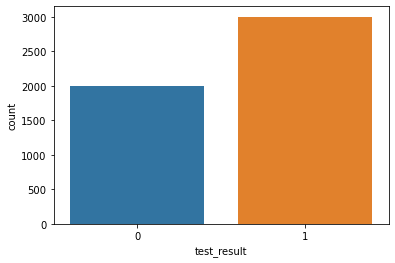

In [9]:
sns.countplot(data = df, x='test_result')

<AxesSubplot:xlabel='test_result', ylabel='age'>

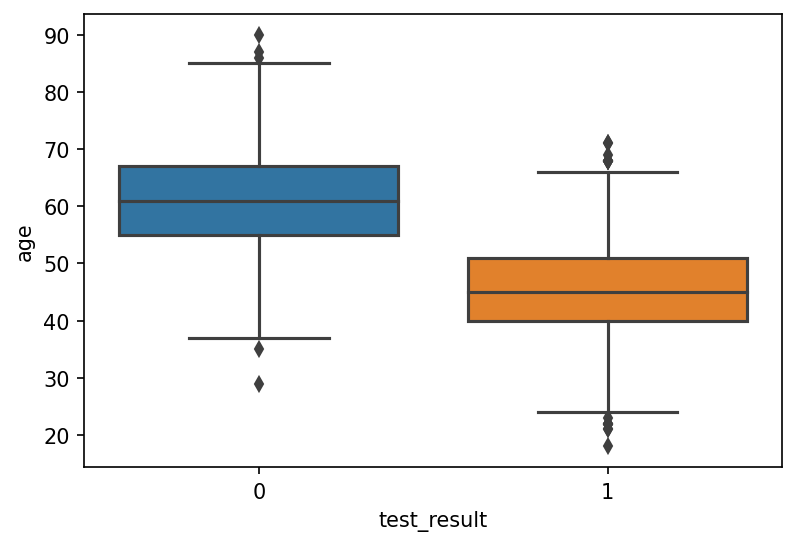

In [11]:
plt.figure(dpi=150)
sns.boxplot(data = df, x='test_result', y='age')

<AxesSubplot:xlabel='age', ylabel='physical_score'>

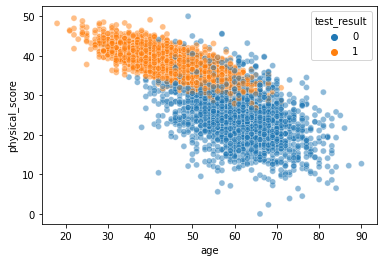

In [14]:
sns.scatterplot(data = df, y='physical_score', x='age',hue ='test_result',alpha=0.5)

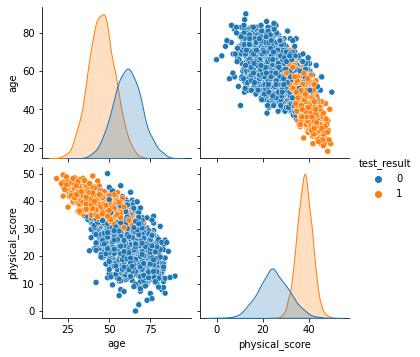

In [15]:
sns.pairplot(df,hue='test_result')

<AxesSubplot:>

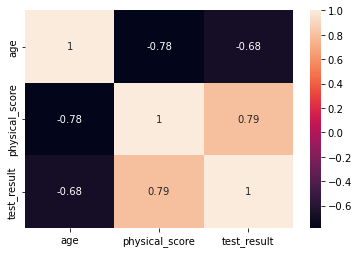

In [16]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

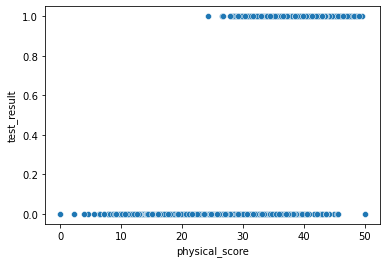

In [18]:
sns.scatterplot(data=df, x='physical_score',y='test_result')

In [19]:
from mpl_toolkits.mplot3d import Axes3D

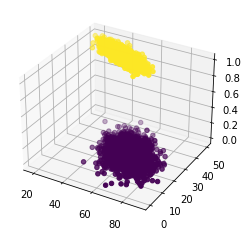

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['physical_score'],df['test_result'],c=df['test_result'])

In [23]:
X = df.drop('test_result',axis=1)

In [24]:
y = df['test_result']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.preprocessing import StandardScaler

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [33]:
scaler = StandardScaler()

In [34]:
scaled_X_train =scaler.fit_transform(X_train)

In [35]:
scaled_X_test =scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_model = LogisticRegression()

In [38]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [39]:
log_model.coef_

array([[-0.88637483,  3.44637017]])

In [40]:
y_pred = log_model.predict(scaled_X_test)

In [41]:
y_pred

array([1, 1, 0, ..., 0, 0, 1])

In [42]:
y_pred = log_model.predict_proba(scaled_X_test)

In [43]:
y_pred

array([[0.02528772, 0.97471228],
       [0.0276414 , 0.9723586 ],
       [0.98859823, 0.01140177],
       ...,
       [0.99348084, 0.00651916],
       [0.99893175, 0.00106825],
       [0.03882928, 0.96117072]])